# $p_{resale}$ calculation

$p_{resale}$ is calculated by iterating through each transaction sorted by time and keeping information on visited transactions.

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

Original data

In [2]:
nft_transactions_ = pd.read_csv('data/Data_API.csv',usecols=['Datetime_updated','Datetime_updated_seconds','Unique_id_collection','Collection_cleaned'])

In [3]:
nft_transactions = nft_transactions_.copy(deep=True)
nft_transactions.Datetime_updated_seconds = pd.to_datetime(nft_transactions.Datetime_updated_seconds)
nft_transactions.Datetime_updates = pd.to_datetime(nft_transactions.Datetime_updated)
nft_transactions.sort_values('Datetime_updated_seconds',inplace=True)

/var/folders/9t/frr8qwnd5h1_3mymt9gwrcm40000gn/T/ipykernel_48968/1025147062.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  nft_transactions.Datetime_updates = pd.to_datetime(nft_transactions.Datetime_updated)


# Calculate s, n and p_resale values

Convert dataframe to dictionary for fast iteration

In [4]:
nfts = nft_transactions.to_dict('index')

In [5]:
visited_nfts = {}
collection_n = {}
collection_s = {}
nft_values = {}
for index, nft in tqdm(nfts.items()):
    unique_id_collection = nft['Unique_id_collection']
    collection_cleaned = nft['Collection_cleaned']
    if collection_cleaned not in collection_s:
       collection_s[collection_cleaned] = 0
    if collection_cleaned not in collection_n:
       collection_n[collection_cleaned] = 0
  
    n = collection_n[collection_cleaned]
    s = collection_s[collection_cleaned]
    if n != 0:
       p_resale = (0.5/(n+1)) + (s/(n+1))
    else:
       p_resale = 0.5
  
    nft_values[index] = {
        'n':n,
        's':s,
        'p_resale':p_resale
    }
    
    if unique_id_collection not in visited_nfts:
       visited_nfts[unique_id_collection] = 1
       collection_n[collection_cleaned] += 1
    elif visited_nfts[unique_id_collection] == 1:
       visited_nfts[unique_id_collection] = 0
       collection_s[collection_cleaned] += 1
        
df_s_n_presale = pd.DataFrame.from_dict(nft_values, orient='index')
df_s_n_presale

  0%|          | 0/6071027 [00:00<?, ?it/s]

,n,s,p_resale
242722,0,0,0.500000
242721,1,0,0.250000
242720,2,0,0.166667
242719,3,0,0.125000
242718,4,0,0.100000
...,...,...,...
2338572,1018910,208444,0.204576
2338573,1018911,208444,0.204576
2338570,1018912,208444,0.204575
2338569,1018913,208444,0.204575


Transfer the columns from the calculation to the original dataframe

In [6]:
nft_transactions['n'] = df_s_n_presale['n']
nft_transactions['s'] = df_s_n_presale['s']
nft_transactions['p_resale'] = df_s_n_presale['p_resale']
nft_transactions

,Datetime_updated,Datetime_updated_seconds,Unique_id_collection,Collection_cleaned,n,s,p_resale
242722,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1001')",Cryptokittie,0,0,0.500000
242721,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1002')",Cryptokittie,1,0,0.250000
242720,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1003')",Cryptokittie,2,0,0.166667
242719,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1004')",Cryptokittie,3,0,0.125000
242718,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1005')",Cryptokittie,4,0,0.100000
...,...,...,...,...,...,...,...
2338572,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529894344')",Alien,1018910,208444,0.204576
2338573,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529899954')",Alien,1018911,208444,0.204576
2338570,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529899571')",Alien,1018912,208444,0.204575
2338569,2021-04-27 00:00:00,2021-04-27 23:59:56,"('alien.worlds', '1099529899986')",Alien,1018913,208444,0.204575


Check if the algorithm we used produces expected result on a collection

In [7]:
nft_transactions[nft_transactions.Collection_cleaned == 'Cryptocelebritie'].loc[:,['Datetime_updated_seconds','n','s','p_resale']]

,Datetime_updated_seconds,n,s,p_resale
4169376,2018-02-04 06:33:49,0,0,0.500000
4169375,2018-02-05 04:10:37,1,0,0.250000
4169374,2018-02-05 18:11:58,2,0,0.166667
4169373,2018-02-05 18:18:39,3,0,0.125000
4169372,2018-02-05 18:44:12,4,0,0.100000
...,...,...,...,...
4504589,2019-07-27 05:13:11,80,8,0.104938
4504588,2019-07-27 05:13:11,80,9,0.117284
4504587,2019-07-27 05:13:12,81,9,0.115854
4504585,2019-07-27 05:18:57,81,10,0.128049


These values are calculated on seconds precision. This leads to values being calculated with NFT transactions made seconds ago.  
We want to use daily resolution, which will lead to calculations being up to only the previous day of the NFT transaction.


In [8]:
day_precision = nft_transactions.groupby(['Datetime_updated','Collection_cleaned']).first().reset_index()
day_precision

,Datetime_updated,Collection_cleaned,Datetime_updated_seconds,Unique_id_collection,n,s,p_resale
0,2017-11-23 00:00:00,Cryptokittie,2017-11-23 18:44:21,"('Cryptokitties', '1001')",0,0,0.500000
1,2017-11-24 00:00:00,Cryptokittie,2017-11-24 00:01:51,"('Cryptokitties', '1131')",480,8,0.017672
2,2017-11-25 00:00:00,Cryptokittie,2017-11-25 00:09:16,"('Cryptokitties', '5794')",886,34,0.038895
3,2017-11-26 00:00:00,Cryptokittie,2017-11-26 00:00:39,"('Cryptokitties', '3882')",1247,60,0.048478
4,2017-11-27 00:00:00,Cryptokittie,2017-11-27 00:25:17,"('Cryptokitties', '8704')",1380,70,0.051050
...,...,...,...,...,...,...,...
83012,2021-04-27 00:00:00,Xcopy,2021-04-27 03:05:42,"('Xcopy', '17600020825')",59,9,0.158333
83013,2021-04-27 00:00:00,Xmonsxyz,2021-04-27 12:57:23,"('0xmons-xyz', '191')",63,13,0.210938
83014,2021-04-27 00:00:00,Yorhghnes,2021-04-27 03:14:48,"('yourh1ghness', '1099528929421')",25,2,0.096154
83015,2021-04-27 00:00:00,Zanygumball,2021-04-27 03:45:36,"('zanygumballs', '1099528843377')",204,6,0.031707


Merge the values with original dataframe on Datetime_updated and Collection_cleaned

In [9]:
# remove old values
try:
    del nft_transactions['n'], nft_transactions['s'], nft_transactions['p_resale']
except:
    pass
nft_transactions = nft_transactions.merge(day_precision.loc[:,['Datetime_updated','Collection_cleaned','n','s','p_resale']], on=['Datetime_updated','Collection_cleaned'], how='left')
nft_transactions

,Datetime_updated,Datetime_updated_seconds,Unique_id_collection,Collection_cleaned,n,s,p_resale
0,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1001')",Cryptokittie,0,0,0.500000
1,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1002')",Cryptokittie,0,0,0.500000
2,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1003')",Cryptokittie,0,0,0.500000
3,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1004')",Cryptokittie,0,0,0.500000
4,2017-11-23 00:00:00,2017-11-23 18:44:21,"('Cryptokitties', '1005')",Cryptokittie,0,0,0.500000
...,...,...,...,...,...,...,...
6071022,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529894344')",Alien,934753,193057,0.206533
6071023,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529899954')",Alien,934753,193057,0.206533
6071024,2021-04-27 00:00:00,2021-04-27 23:59:55,"('alien.worlds', '1099529899571')",Alien,934753,193057,0.206533
6071025,2021-04-27 00:00:00,2021-04-27 23:59:56,"('alien.worlds', '1099529899986')",Alien,934753,193057,0.206533


Check results on the same collection

In [10]:
nft_transactions[nft_transactions.Collection_cleaned == 'Cryptocelebritie'].loc[:,['Datetime_updated_seconds','n','s','p_resale']]

,Datetime_updated_seconds,n,s,p_resale
289795,2018-02-04 06:33:49,0,0,0.50000
290580,2018-02-05 04:10:37,1,0,0.25000
291023,2018-02-05 18:11:58,1,0,0.25000
291027,2018-02-05 18:18:39,1,0,0.25000
291038,2018-02-05 18:44:12,1,0,0.25000
...,...,...,...,...
981640,2019-07-27 05:13:11,79,8,0.10625
981641,2019-07-27 05:13:11,79,8,0.10625
981642,2019-07-27 05:13:12,79,8,0.10625
981644,2019-07-27 05:18:57,79,8,0.10625


# Visualize the values of top 10 collections

Collection_cleaned
Alien            Axes(0.125,0.11;0.775x0.226471)
Axie             Axes(0.125,0.11;0.775x0.226471)
Cryptokittie     Axes(0.125,0.11;0.775x0.226471)
Godsunchained    Axes(0.125,0.11;0.775x0.226471)
Kogsofficial     Axes(0.125,0.11;0.775x0.226471)
Mlb.topp         Axes(0.125,0.11;0.775x0.226471)
Official         Axes(0.125,0.11;0.775x0.226471)
Rari             Axes(0.125,0.11;0.775x0.226471)
Sorare           Axes(0.125,0.11;0.775x0.226471)
Stf.capcom       Axes(0.125,0.11;0.775x0.226471)
Name: p_resale, dtype: object

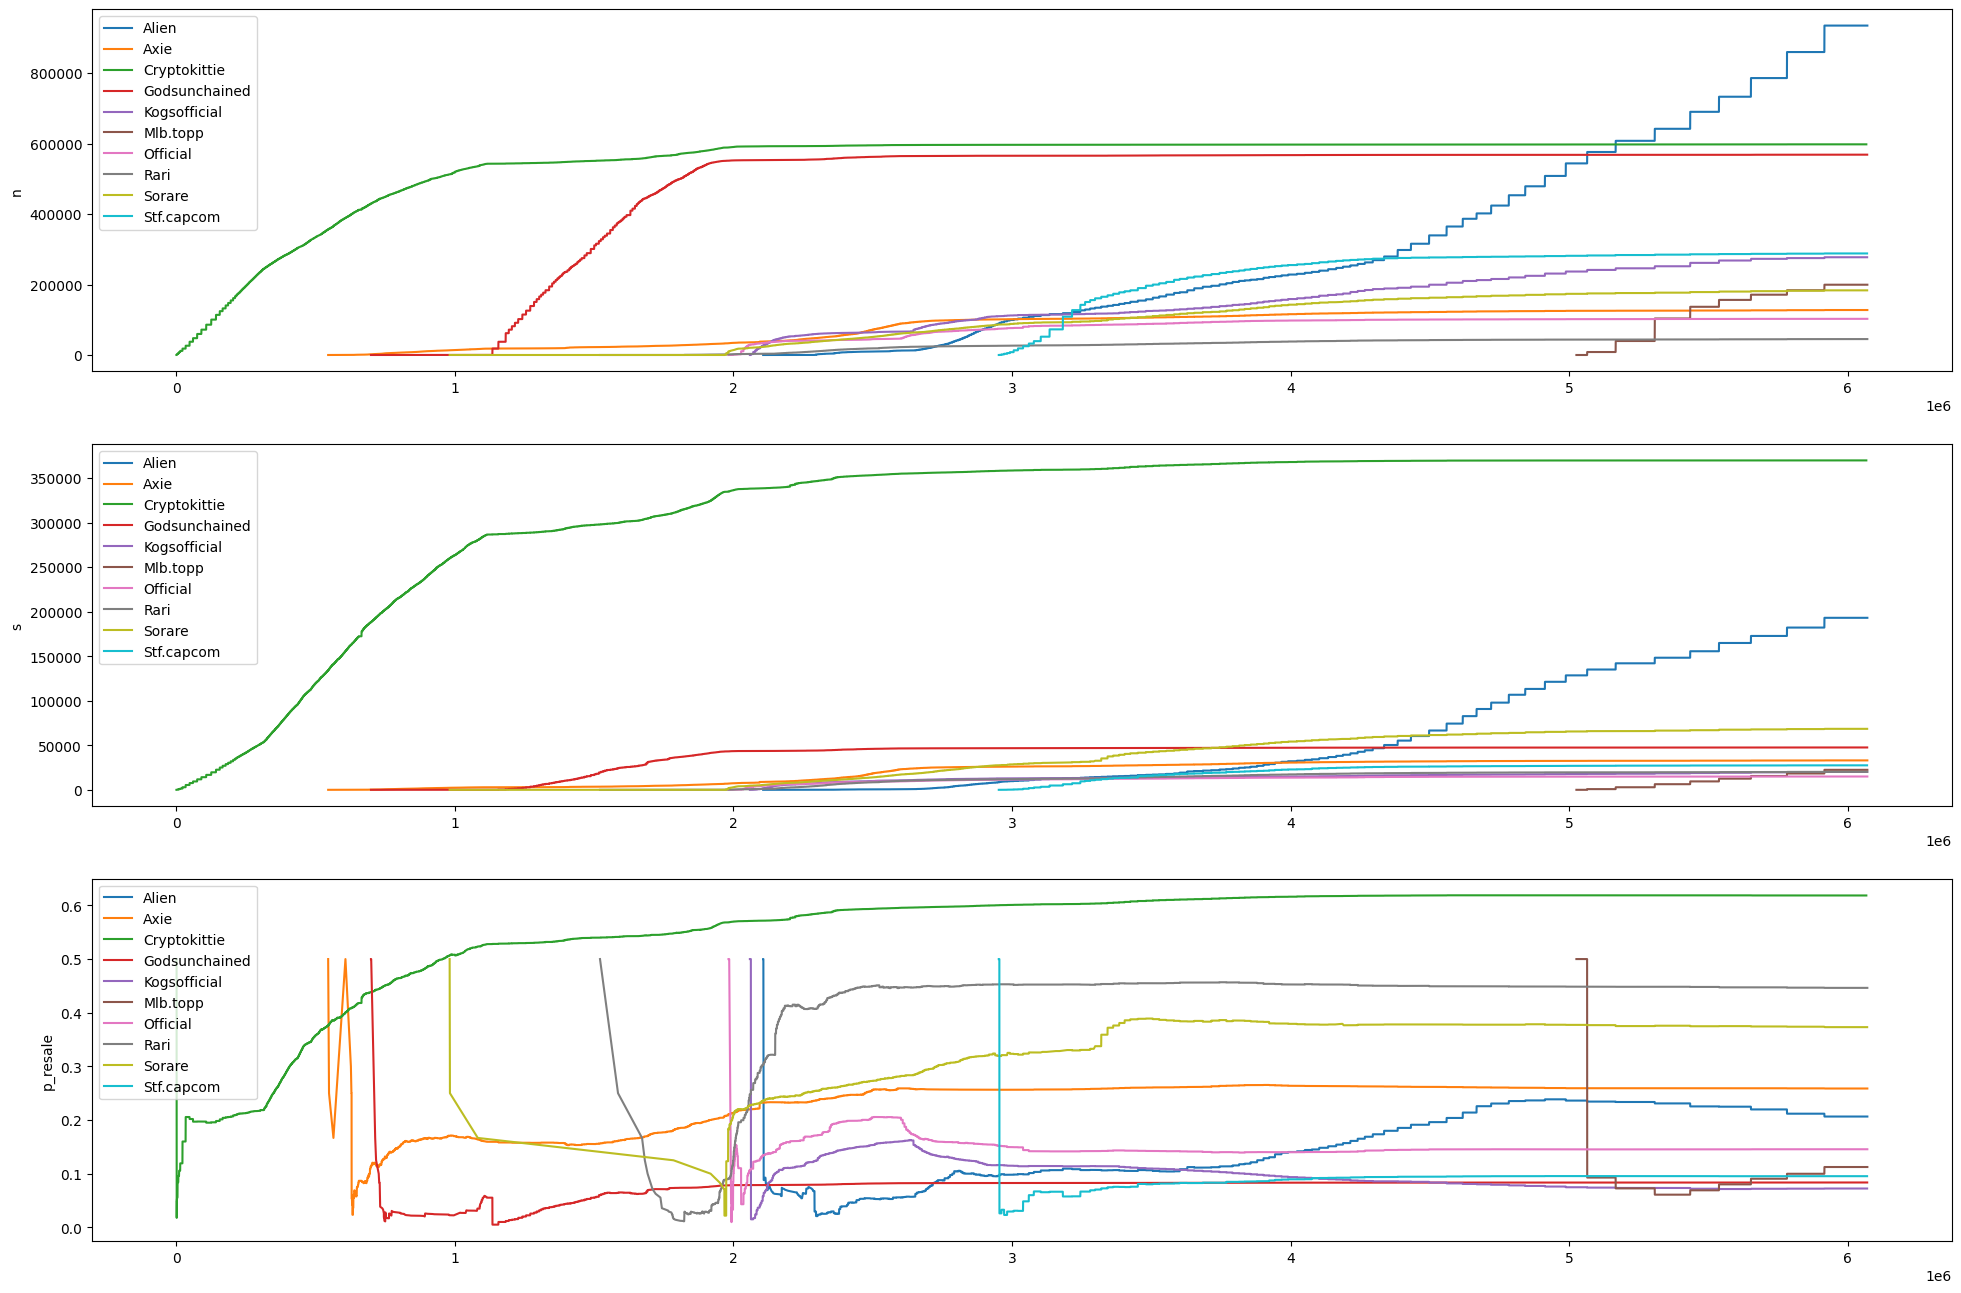

In [11]:
top_collections = nft_transactions.groupby('Collection_cleaned').size().sort_values()[-10:].index
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(24,16))
nft_transactions[nft_transactions.Collection_cleaned.isin(top_collections)].groupby('Collection_cleaned').n.plot(legend=True, ax=axes[0], ylabel='n')
nft_transactions[nft_transactions.Collection_cleaned.isin(top_collections)].groupby('Collection_cleaned').s.plot(legend=True, ax=axes[1], ylabel='s')
nft_transactions[nft_transactions.Collection_cleaned.isin(top_collections)].groupby('Collection_cleaned').p_resale.plot(legend=True, ax=axes[2], ylabel='p_resale')

# Save

In [12]:
#nft_transactions.loc[:,'p_resale'].to_csv('data/p_resale.csv')